In [1]:
import pandas as pd

# Load dataset (change path if file is not in same folder)
df = pd.read_csv('SMSSpamCollection', sep='\t', header=None, names=['label', 'message'])

# Show first 5 rows of the dataset
df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [2]:
print(df['label'].value_counts())


label
ham     4825
spam     747
Name: count, dtype: int64


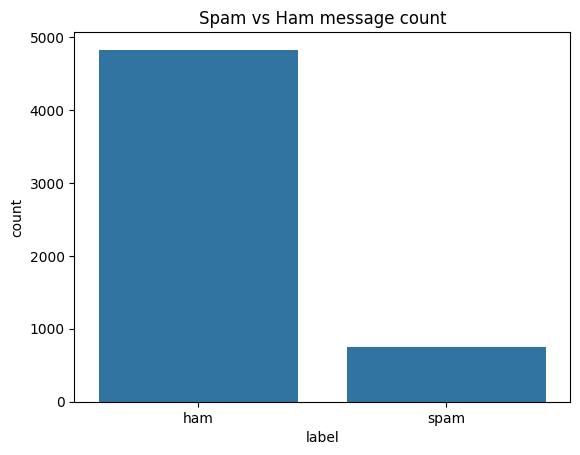

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='label', data=df)
plt.title("Spam vs Ham message count")
plt.show()


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the vectorizer with English stop words removal
tfidf = TfidfVectorizer(stop_words='english')

# Convert the text messages into numerical features
X = tfidf.fit_transform(df['message'])

# Convert labels into numbers: 0 for ham, 1 for spam
y = df['label'].map({'ham': 0, 'spam': 1})

print("Shape of feature matrix:", X.shape)
print("Number of labels:", y.shape)


Shape of feature matrix: (5572, 8444)
Number of labels: (5572,)


In [5]:
from sklearn.model_selection import train_test_split

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])


Training set size: 4457
Test set size: 1115


In [6]:
from sklearn.linear_model import LogisticRegression

# Create the model
model = LogisticRegression(max_iter=1000)

# Train the model on training data
model.fit(X_train, y_train)

print("Model training complete!")


Model training complete!


In [7]:
from sklearn.metrics import accuracy_score, classification_report

# Predict labels for test set
y_pred = model.predict(X_test)

# Calculate accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Detailed report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9596412556053812

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.70      0.82       149

    accuracy                           0.96      1115
   macro avg       0.98      0.85      0.90      1115
weighted avg       0.96      0.96      0.96      1115



In [8]:
def predict_spam(text):
    # Convert the text to the same TF-IDF format
    text_tfidf = tfidf.transform([text])
    # Predict with the trained model
    pred = model.predict(text_tfidf)[0]
    return 'Spam' if pred == 1 else 'Not Spam'

# Try out some examples
print(predict_spam("Congratulations! You won a free ticket!"))
print(predict_spam("Hey, are we meeting tomorrow?"))


Not Spam
Not Spam


In [9]:
while True:
    text = input("Enter a message to check (or type 'exit' to stop): ")
    if text.lower() == 'exit':
        break
    print("Prediction:", predict_spam(text))


Enter a message to check (or type 'exit' to stop):  Win a brand new car now


Prediction: Not Spam


Enter a message to check (or type 'exit' to stop):  "Urgent! Your account will be locked."


Prediction: Not Spam


Enter a message to check (or type 'exit' to stop):  "Let’s have lunch today."


Prediction: Not Spam


Enter a message to check (or type 'exit' to stop):  Are you coming to class?"


Prediction: Not Spam



KeyboardInterrupt



In [10]:
from sklearn.ensemble import RandomForestClassifier

# Create and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Test accuracy
y_pred_rf = rf_model.predict(X_test)
from sklearn.metrics import accuracy_score
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.97847533632287


In [11]:
def predict_spam_rf(text):
    text_tfidf = tfidf.transform([text])
    pred = rf_model.predict(text_tfidf)[0]
    return 'Spam' if pred == 1 else 'Not Spam'

print(predict_spam_rf("Win a brand new car now!"))
print(predict_spam_rf("Are you coming to class?"))


Not Spam
Not Spam


In [12]:
from sklearn.svm import LinearSVC

# Create the SVM model
svm_model = LinearSVC()

# Train the model
svm_model.fit(X_train, y_train)

# Predict on test data
y_pred_svm = svm_model.predict(X_test)

# Check accuracy
from sklearn.metrics import accuracy_score
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))



SVM Accuracy: 0.9802690582959641


In [13]:
def predict_spam_svm(text):
    text_tfidf = tfidf.transform([text])
    pred = svm_model.predict(text_tfidf)[0]
    return 'Spam' if pred == 1 else 'Not Spam'

print(predict_spam_svm("Win a brand new car now!"))
print(predict_spam_svm("Are you coming to class?"))
print(predict_spam_svm("Urgent! Your account will be locked."))
print(predict_spam_svm("Let’s have lunch today."))


Not Spam
Not Spam
Spam
Not Spam


In [14]:
import joblib

joblib.dump(svm_model, 'svm_spam_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [15]:
import joblib

joblib.dump(svm_model, 'svm_spam_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']